# SET UP

In [10]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [13]:
!pip install folium

     |████████████████████████████████| 96 kB 2.9 MB/s eta 0:00:01


In [27]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import folium

In [4]:
pd.set_option('display.max_columns', None)   # mostrar todas las columnas del df
#pd.set_option('display.max_rows', None)   # mostrar todas las filas del df

In [12]:
data = pd.read_csv("./Desktop/MA22RT_PROJECT/laps_database/DIVISION_copia/FSS_ENDURANCE_ALBA_LAP_1.csv", sep=",", encoding='latin')

data.head()



,Time,Distance,Logger Temperature,AccelerometerX,AccelerometerY,AccelerometerZ,GyroX,GyroY,GyroZ,Int Batt Voltage,RPM,Calculated_Gear,GPS_Speed,GPS_Nsat,GPS_LatAcc,GPS_LonAcc,GPS_Slope,GPS_Heading,GPS_Gyro,GPS_Altitude,GPS_PosAccuracy,GPS_SpdAccuracy,GPS_Latitude,GPS_Longitude,GPS_Elevation
0,0.00,0.000,33.687458,0.336049,-0.030920,-1.106257,0.126529,-0.397233,-0.057876,3.829999,7966.614258,1.999969,47.418003,13.00,-0.039125,0.137165,-0.871206,82.119934,-1.597500,338.462311,1.3100,0.17,41.592221,1.688818,338.46
1,0.05,0.001,33.687458,0.280212,-0.037097,-1.084871,0.029263,-0.612686,-0.209471,3.829999,7814.084473,1.999969,47.518002,13.00,-0.061750,0.060049,-0.874071,82.074097,-2.582988,338.454315,1.3100,0.17,41.592222,1.688825,338.45
2,0.10,0.001,33.687458,0.217850,-0.046059,-1.062477,-0.122091,-0.709052,-0.514913,3.830011,7701.048828,1.999969,47.582001,13.09,-0.080589,-0.016207,-0.876935,82.029289,-3.403463,338.446075,1.3100,0.17,41.592222,1.688833,338.45
3,0.15,0.002,33.687458,0.153605,-0.055294,-1.038093,-0.272904,-0.747262,-0.929335,3.830074,7756.823730,1.999969,47.482002,13.59,-0.082183,-0.088543,-0.879800,81.989182,-3.472218,338.436523,1.3100,0.17,41.592223,1.688841,338.44
4,0.20,0.003,33.687458,0.078337,-0.067040,-1.010092,-0.422874,-0.846158,-1.397355,3.830161,7696.841797,1.999969,47.328003,14.00,-0.079703,-0.159847,-0.883696,81.950104,-3.359460,338.426880,1.3091,0.17,41.592224,1.688849,338.43


In [18]:
GPS_data=data.copy()

In [20]:
GPS_data.head()

,Time,Distance,Logger Temperature,AccelerometerX,AccelerometerY,AccelerometerZ,GyroX,GyroY,GyroZ,Int Batt Voltage,RPM,Calculated_Gear,GPS_Speed,GPS_Nsat,GPS_LatAcc,GPS_LonAcc,GPS_Slope,GPS_Heading,GPS_Gyro,GPS_Altitude,GPS_PosAccuracy,GPS_SpdAccuracy,GPS_Latitude,GPS_Longitude,GPS_Elevation
0,0.00,0.000,33.687458,0.336049,-0.030920,-1.106257,0.126529,-0.397233,-0.057876,3.829999,7966.614258,1.999969,47.418003,13.00,-0.039125,0.137165,-0.871206,82.119934,-1.597500,338.462311,1.3100,0.17,41.592221,1.688818,338.46
1,0.05,0.001,33.687458,0.280212,-0.037097,-1.084871,0.029263,-0.612686,-0.209471,3.829999,7814.084473,1.999969,47.518002,13.00,-0.061750,0.060049,-0.874071,82.074097,-2.582988,338.454315,1.3100,0.17,41.592222,1.688825,338.45
2,0.10,0.001,33.687458,0.217850,-0.046059,-1.062477,-0.122091,-0.709052,-0.514913,3.830011,7701.048828,1.999969,47.582001,13.09,-0.080589,-0.016207,-0.876935,82.029289,-3.403463,338.446075,1.3100,0.17,41.592222,1.688833,338.45
3,0.15,0.002,33.687458,0.153605,-0.055294,-1.038093,-0.272904,-0.747262,-0.929335,3.830074,7756.823730,1.999969,47.482002,13.59,-0.082183,-0.088543,-0.879800,81.989182,-3.472218,338.436523,1.3100,0.17,41.592223,1.688841,338.44
4,0.20,0.003,33.687458,0.078337,-0.067040,-1.010092,-0.422874,-0.846158,-1.397355,3.830161,7696.841797,1.999969,47.328003,14.00,-0.079703,-0.159847,-0.883696,81.950104,-3.359460,338.426880,1.3091,0.17,41.592224,1.688849,338.43


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
len(data.columns)

25

In [11]:
data2 = pd.read_csv('./Desktop/MA22RT_PROJECT/laps_database/DIVISION_copia/FSS_ENDURANCE_DAVID_LAP_1.csv', encoding='latin')

data2.head()

,Time,Distance,Logger Temperature,AccelerometerX,AccelerometerY,AccelerometerZ,GyroX,GyroY,GyroZ,Int Batt Voltage,RPM,Calculated_Gear,GPS_Speed,GPS_Nsat,GPS_LatAcc,GPS_LonAcc,GPS_Slope,GPS_Heading,GPS_Gyro,GPS_Altitude,GPS_PosAccuracy,GPS_SpdAccuracy,GPS_Latitude,GPS_Longitude,GPS_Elevation
0,0.00,0.000,32.069431,0.274842,-0.061814,-1.090045,-0.211198,-0.067684,-1.529371,3.804088,4930.721191,4.0,44.304001,14.0,0.028348,0.213223,-0.934861,83.398315,1.454760,344.853729,1.56,0.2172,41.592255,1.688815,344.85
1,0.05,0.001,32.072266,0.270537,-0.060949,-1.083795,-0.206138,-0.226996,-1.528751,3.804062,4972.428223,4.0,44.675999,14.0,0.014276,0.225179,-0.958467,83.378601,0.752543,344.844727,1.56,0.2200,41.592256,1.688823,344.85
2,0.10,0.001,32.075100,0.265366,-0.059074,-1.080474,-0.206138,-0.355191,-1.486798,3.804127,5012.708984,4.0,45.076000,14.0,-0.011217,0.243024,-0.975656,83.355682,-0.507964,344.834229,1.56,0.2200,41.592257,1.688830,344.84
3,0.15,0.002,32.077938,0.259281,-0.056438,-1.079011,-0.217776,-0.398006,-1.424179,3.804206,5050.516602,4.0,45.520000,14.0,-0.031662,0.256522,-0.992845,83.335289,-1.506285,344.822662,1.56,0.2200,41.592257,1.688838,344.82
4,0.20,0.003,32.080772,0.254726,-0.053182,-1.077153,-0.229993,-0.365954,-1.351226,3.804304,5058.894531,4.0,46.020000,14.0,-0.045683,0.264489,-1.010033,83.318100,-2.170916,344.809723,1.56,0.2200,41.592258,1.688846,344.81


In [8]:
x= '0.000,0.000,33.687458,0.336049,-0.030920,-1.106257,0.126529,-0.397233,-0.057876,3.829999,7966.614258,1.999969,47.418003,13.000000,-0.039125,0.137165,-0.871206,82.119934,-1.597500,338.462311,1.310000,0.170000,41.592220672843,1.688817578169,338.46'

In [9]:
len(x.split(','))

25

# EXPLORATION AND CLEANING

In [14]:
#Map creation

In [17]:
#Primero hay que extraer los datos de longitud, latitud,altitud, tiempo, speed. Se duplica la dataframe
#nos quedamos con los datos que nos importan

In [21]:
GPS_data.head()

,Time,Distance,Logger Temperature,AccelerometerX,AccelerometerY,AccelerometerZ,GyroX,GyroY,GyroZ,Int Batt Voltage,RPM,Calculated_Gear,GPS_Speed,GPS_Nsat,GPS_LatAcc,GPS_LonAcc,GPS_Slope,GPS_Heading,GPS_Gyro,GPS_Altitude,GPS_PosAccuracy,GPS_SpdAccuracy,GPS_Latitude,GPS_Longitude,GPS_Elevation
0,0.00,0.000,33.687458,0.336049,-0.030920,-1.106257,0.126529,-0.397233,-0.057876,3.829999,7966.614258,1.999969,47.418003,13.00,-0.039125,0.137165,-0.871206,82.119934,-1.597500,338.462311,1.3100,0.17,41.592221,1.688818,338.46
1,0.05,0.001,33.687458,0.280212,-0.037097,-1.084871,0.029263,-0.612686,-0.209471,3.829999,7814.084473,1.999969,47.518002,13.00,-0.061750,0.060049,-0.874071,82.074097,-2.582988,338.454315,1.3100,0.17,41.592222,1.688825,338.45
2,0.10,0.001,33.687458,0.217850,-0.046059,-1.062477,-0.122091,-0.709052,-0.514913,3.830011,7701.048828,1.999969,47.582001,13.09,-0.080589,-0.016207,-0.876935,82.029289,-3.403463,338.446075,1.3100,0.17,41.592222,1.688833,338.45
3,0.15,0.002,33.687458,0.153605,-0.055294,-1.038093,-0.272904,-0.747262,-0.929335,3.830074,7756.823730,1.999969,47.482002,13.59,-0.082183,-0.088543,-0.879800,81.989182,-3.472218,338.436523,1.3100,0.17,41.592223,1.688841,338.44
4,0.20,0.003,33.687458,0.078337,-0.067040,-1.010092,-0.422874,-0.846158,-1.397355,3.830161,7696.841797,1.999969,47.328003,14.00,-0.079703,-0.159847,-0.883696,81.950104,-3.359460,338.426880,1.3091,0.17,41.592224,1.688849,338.43


In [22]:
#eliminamos columnas que no interesan
cols=['Distance', 'Logger Temperature','AccelerometerX','AccelerometerY','AccelerometerZ','GyroX','GyroY','Int Batt Voltage','RPM','Calculated_Gear','GPS_Nsat','GPS_LatAcc','GPS_LonAcc','GPS_Slope','GPS_Heading','GPS_Gyro','GPS_PosAccuracy','GPS_SpdAccuracy','GPS_Elevation']

GPS_data.drop(columns=cols, inplace=True)

In [24]:
col=['GyroZ']
GPS_data.drop(columns=col, inplace=True)

In [43]:
GPS_data

,Time,GPS_Speed,GPS_Altitude,GPS_Latitude,GPS_Longitude
0,0.00,47.418003,338.462311,41.592221,1.688818
1,0.05,47.518002,338.454315,41.592222,1.688825
2,0.10,47.582001,338.446075,41.592222,1.688833
3,0.15,47.482002,338.436523,41.592223,1.688841
4,0.20,47.328003,338.426880,41.592224,1.688849
...,...,...,...,...,...
1932,96.60,75.718002,339.465576,41.592230,1.688772
1933,96.65,75.818001,339.444641,41.592231,1.688785
1934,96.70,75.828003,339.422852,41.592232,1.688797
1935,96.75,75.428001,339.397339,41.592234,1.688810


In [45]:
#crear mapa
mapa=folium.Map(location=[41.592221,1.688818 ], 
                 tiles='stamentoner', 
                 zoom_start=12)

lat=[41.592223,41.592230,41.592232]
lng=[1.688841, 1.688841, 1.688797]

for i in range(len(lat)):
    folium.Marker([lat[i], lng[i]], icon=folium.Icon(color='red')).add_to(mapa)
    
    


mapa

In [11]:
import numpy
from stl import mesh

In [12]:
M22RT = mesh.Mesh.from_file('./Desktop/M22RT.STL')

exception (False, 'b\'\\x80e\\x0e\\xe2\\xb9c\\t\\xe7\\x05emk\\x80e\\xf5\\xfa\\xb3c\\xf5\\x88\\x05e\\x00\\x00{\\xef\\xdf\\xbe\\x00\\x00\\x00"27f\\xbfx\\xe6\\x7fe\\x08\\x10\\xb3c\\xcf\\xfd\\x05e\\x83e\\x80e\\xae\\xf1\\xb2c\\x97\\x8e\\x05e3\\xdc\\x7fe\\xa3\\xa7\\xb2c\\xbe\\x02\\x06e\\x00\\x00{\\xef\\xdf\\xbe\\x00\\x00\\x00"27f\\xbf3\\xdc\\x7fe\\xa3\\xa7\\xb2c\\xbe\\x02\\x06e\\x83e\\x80e\\xae\\xf1\\xb2c\\x97\\x8e\\x05e\\xc8e\\x80es\\xa9\\xb2ct\\x8e\\x05e\\x00\\x00{\\xef\\xdf\\xbe\\x00\\x00\\x00"27f\\xbf3\\xdc\\x7fe\\xa3\\xa7\\xb2c\\xbe\\x02\\x06e\\xc8e\\x80es\\xa9\\xb2ct\\x8e\\x05ez\\xcf\\x7fe<>\\xb2c\\xee\\x08\\x06e\\x00\\x00{\\xef\\xdf\\xbe\\x00\\x00\\x00"27f\\xbfz\\xcf\\x7fe<>\\xb2c\\xee\\x08\\x06e\\xc8e\\x80es\\xa9\\xb2ct\\x8e\\x05ew\\xc1\\x7fe\\xb8\\xe2\\xb1c\\xbf\\x0f\\x06e\\x00\\x00{\\xef\\xdf\\xbe\\x00\\x00\\x00"27f\\xbf\\x06\\x93\\x80e\\xcdn\\xb3cqb\\x05ea\\x91\\x80e(\\xb1\\xb3c\\xebc\\x05e\\x9dy\\x80e\\x86\\x0c\\xbbc\\t{\\x05e\\x00\\x00{\\xef\\xdf\\xbe\\x00\\x00\\x00"27f\\xbf\\x9

exception (False, 'b\'\\x80e\\x0e\\xe2\\xb9c\\t\\xe7\\x05emk\\x80e\\xf5\\xfa\\xb3c\\xf5\\x88\\x05e\\x00\\x00{\\xef\\xdf\\xbe\\x00\\x00\\x00"27f\\xbfx\\xe6\\x7fe\\x08\\x10\\xb3c\\xcf\\xfd\\x05e\\x83e\\x80e\\xae\\xf1\\xb2c\\x97\\x8e\\x05e3\\xdc\\x7fe\\xa3\\xa7\\xb2c\\xbe\\x02\\x06e\\x00\\x00{\\xef\\xdf\\xbe\\x00\\x00\\x00"27f\\xbf3\\xdc\\x7fe\\xa3\\xa7\\xb2c\\xbe\\x02\\x06e\\x83e\\x80e\\xae\\xf1\\xb2c\\x97\\x8e\\x05e\\xc8e\\x80es\\xa9\\xb2ct\\x8e\\x05e\\x00\\x00{\\xef\\xdf\\xbe\\x00\\x00\\x00"27f\\xbf3\\xdc\\x7fe\\xa3\\xa7\\xb2c\\xbe\\x02\\x06e\\xc8e\\x80es\\xa9\\xb2ct\\x8e\\x05ez\\xcf\\x7fe<>\\xb2c\\xee\\x08\\x06e\\x00\\x00{\\xef\\xdf\\xbe\\x00\\x00\\x00"27f\\xbfz\\xcf\\x7fe<>\\xb2c\\xee\\x08\\x06e\\xc8e\\x80es\\xa9\\xb2ct\\x8e\\x05ew\\xc1\\x7fe\\xb8\\xe2\\xb1c\\xbf\\x0f\\x06e\\x00\\x00{\\xef\\xdf\\xbe\\x00\\x00\\x00"27f\\xbf\\x06\\x93\\x80e\\xcdn\\xb3cqb\\x05ea\\x91\\x80e(\\xb1\\xb3c\\xebc\\x05e\\x9dy\\x80e\\x86\\x0c\\xbbc\\t{\\x05e\\x00\\x00{\\xef\\xdf\\xbe\\x00\\x00\\x00"27f\\xbf\\x9

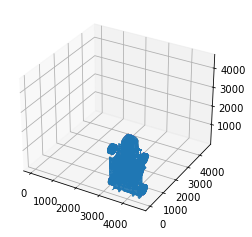

In [13]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
M22RT = mesh.Mesh.from_file('./Desktop/M22RT.STL')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(M22RT.vectors))

# Auto scale to the mesh size
scale = M22RT.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()